In [8]:
import numpy as np
import pandas as pd

file = open("/qbio/nest/prom317/tutorial/transcriptomeAlignment/RPF_siLuc/ForwardStrand.out.sam", 'r')
lines = file.readlines()
transDict = {}
for line in lines:
    linesep = line.split('\t')
    samID = linesep[0]
    transcript_id = linesep[2].split('|')[0]
    pos = int(linesep[3])
    try:
        transDict[transcript_id].append([pos,samID])
    except KeyError:
        transDict[transcript_id] = [[pos,samID]]
    
file.close()

In [29]:
import pickle
with open('longestIsoform.txt', 'rb') as f:
    longestIsoform = pickle.load(f)

In [30]:
trCsv = open("CodingTranscript.csv", 'r')
lines = trCsv.readlines()
codingDic = {}
for line in lines:
    lineSep = line.split('\t')
    if lineSep[0] in longestIsoform:
        codingDic[lineSep[0]] = (int(float(lineSep[1])), int(float(lineSep[2][:-1])))


In [32]:
startList=[]
endList=[]
for i in transDict.keys():
    try:
        for j in transDict[i]:
            startList.append(j[0] - codingDic[i][0])
            endList.append(j[0] - codingDic[i][1])
    except KeyError:
        continue

[711, 687, 693, 680, 711, 585, 572, 584, 655, 686, 681, 672, 573, 650, 693, 684, 734, 575, 588, 617, -103, 672, -102, -84, -78, 686, 650, 576, -96, 683, 680, 681, 686, 674, -68, -103, 591, 572, 570, 585, 602, -108, -103, 608, -88, 551, 663, 741, 746, 572, 680, 692, 573, -103, 588, 683, 663, 738, -97, 653, -69, 650, -76, 692, 711, 608, 737, 584, -102, 603, 683, 741, 699, 602, 657, 683, 602, 713, 585, 588, -73, 731, 581, 669, 597, 667, 708, 681, 602, -88, 681, -85, 738, 681, -102, 656, 664, 585, 585, 608]


In [33]:
newStartList = []
for i in startList:
    if (i >= -50) & (i <= 50):
        newStartList.append(i)
        
newEndList = []
for i in endList:
    if (i >= -50) & (i <= 50):
        newEndList.append(i)

In [36]:
file = open("/qbio/nest/prom317/tutorial/transcriptomeAlignment/RPF_siLin28a/ForwardStrand.out.sam", 'r')
lines = file.readlines()
transDict1 = {}
for line in lines:
    linesep = line.split('\t')
    transcript_id = linesep[2].split('|')[0]
    pos = int(linesep[3])
    try:
        transDict1[transcript_id].append(pos)
    except KeyError:
        transDict1[transcript_id] = [pos]
file.close()

In [37]:
startList1=[]
endList1=[]
for i in transDict1.keys():
    try:
        for j in transDict1[i]:
            startList1.append(j - codingDic[i][0])
            endList1.append(j - codingDic[i][1])
    except KeyError:
        continue

In [38]:
newStartList1 = []
for i in startList1:
    if (i >= -50) & (i <= 50):
        newStartList1.append(i)
        
newEndList1 = []
for i in endList1:
    if (i >= -50) & (i <= 50):
        newEndList1.append(i)

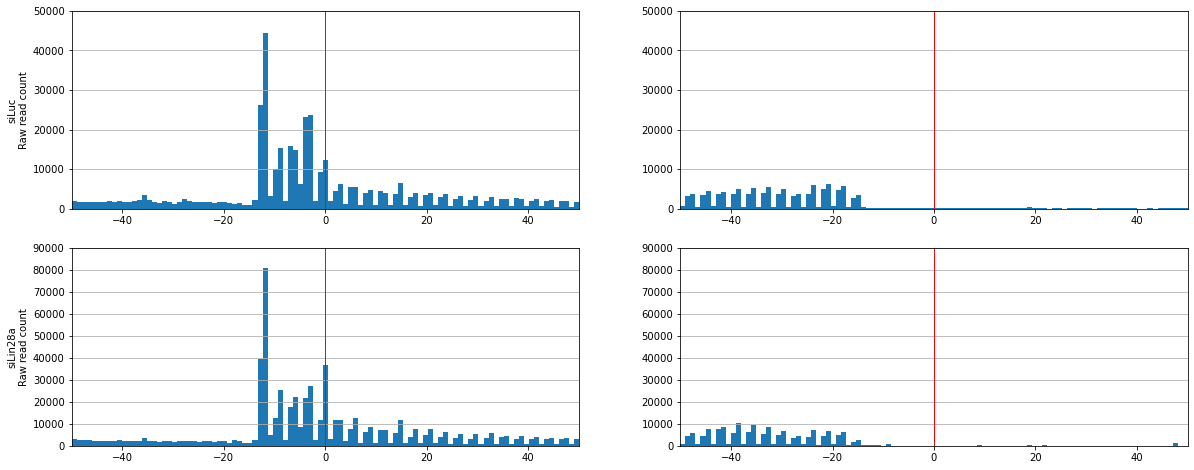

In [43]:
plt.rcParams["figure.figsize"] = (20,8)

plt.subplot(221)
plt.hist(newStartList, bins = 101)
plt.xlim(-50, 50)
plt.ylim(0,50000)
plt.grid(which = 'major', axis = 'y')
plt.ylabel('siLuc\nRaw read count')
plt.axvline(x=0, color = 'r', linewidth=1)

plt.subplot(222)
plt.hist(newEndList, bins = 101)
plt.xlim(-50,50)
plt.ylim(0,50000)
plt.grid(which = 'major', axis = 'y')
plt.axvline(x=0, color = 'r', linewidth=1)

plt.subplot(223)
plt.hist(newStartList1, bins = 101)
plt.xlim(-50, 50)
plt.ylim(0,90000)
plt.grid(which = 'major', axis = 'y')
plt.ylabel('siLin28a\nRaw read count')
plt.axvline(x=0, color = 'r', linewidth=1)

plt.subplot(224)
plt.hist(newEndList1, bins = 101)
plt.xlim(-50, 50)
plt.ylim(0,90000)
plt.grid(which = 'major', axis = 'y')
plt.axvline(x=0, color = 'r', linewidth=1)
plt.savefig("FigureS5A")
plt.show()

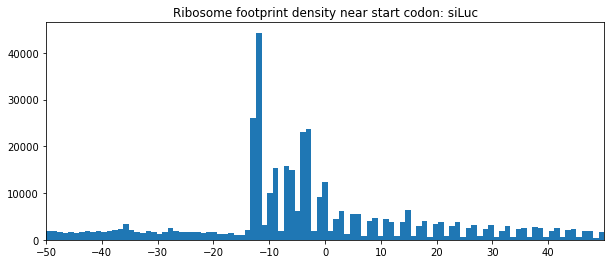

In [34]:
import matplotlib.pyplot as plt

plt.hist(newStartList, bins = 101)
plt.title('Ribosome footprint density near start codon: siLuc')
plt.rcParams["figure.figsize"] = (10,4)
plt.xticks(np.arange(-50,50,10))
plt.xlim(-50, 50)
plt.show()

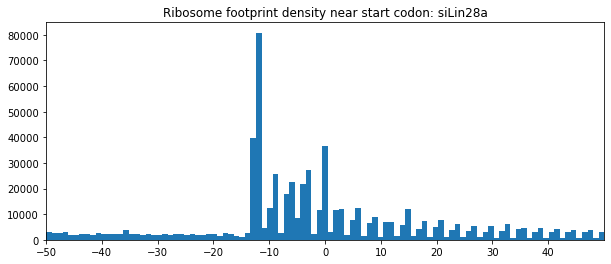

In [39]:
plt.hist(newStartList1, bins = 101)
plt.title('Ribosome footprint density near start codon: siLin28a')
plt.rcParams["figure.figsize"] = (10,4)
plt.xticks(np.arange(-50,50,10))
plt.xlim(-50, 50)
plt.show()

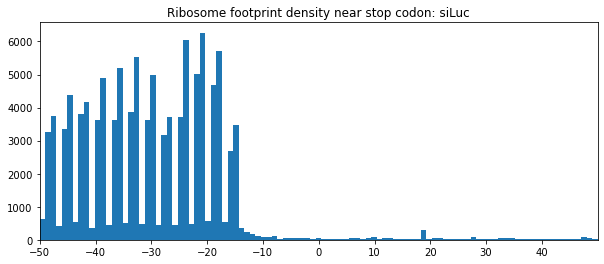

In [35]:
plt.hist(newEndList, bins = 101)
plt.title('Ribosome footprint density near stop codon: siLuc')
plt.xticks(np.arange(-50,50,10))
plt.xlim(-50,50)
plt.show()

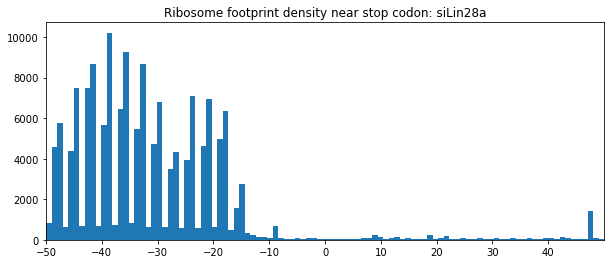

In [40]:
plt.hist(newEndList1, bins = 101)
plt.title('Ribosome footprint density near stop codon: siLin28a')
plt.xticks(np.arange(-50,50,10))
plt.xlim(-50,50)
plt.show()